# Introduction

The data is about the hotels reviews from Trip Advisor website. I downloaded it from Kaggle.   
In this data set, it has two columns, one is the reviews, another one is the rating from 1 to 5 accompanying with that review. The data has 20491 objects in total.
Reference to: https://www.kaggle.com/andrewmvd/trip-advisor-hotel-reviews  


Basically, in this Kaggle competition, they want to predict the correct rating based on the reviews. So, I take it as a classification problem and I would utilze the models including tree models to tackle.  

Here is what I thought, since we learned couple models in classes, we could just choose three popular models to see which one works best instead of stop at nothing to get the best accuracy. (In this competition, most people would use XGBoost and deep learning to build the model.) In other words, we may just slightly change the problem that we are going to deal with the data. 
To be more specific, we choose logistic regression, random forest classification and gradient boosting classification models to attack the problem and compare the results from this three models. The reason why I choose this three models, not just merely they are popular but they have their own advantages and could bring good outcome. I would explain more later below.

In [378]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
import nltk
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from gensim.models.word2vec import Word2Vec
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Preprocessing data

The first step is to clean the data. Since it is text data gathered from populations' reviews, it might contain some typo, we use WordNetLemmatizer function to clean the data. Meanwhile check the missing value.

In [192]:
nltk.download('wordnet', '/Users/YuwenChiu/nltk_data/')  

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/YuwenChiu/nltk_data/...
[nltk_data]   Package wordnet is already up-to-date!


True

In [193]:
stopwords = set(STOPWORDS)

In [194]:
data = pd.read_csv('tripadvisor_hotel_reviews.csv')
data.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [195]:
data.isnull().sum()

Review    0
Rating    0
dtype: int64

In [196]:
data['Review'][0]

'nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  '

In [197]:
worda=[]
for i in range(len(data)):
    wordlist = re.sub("[^\w]", " ", data['Review'][i]).split() 
    worda.extend(wordlist)

In [198]:
print(worda[:50])

['nice', 'hotel', 'expensive', 'parking', 'got', 'good', 'deal', 'stay', 'hotel', 'anniversary', 'arrived', 'late', 'evening', 'took', 'advice', 'previous', 'reviews', 'did', 'valet', 'parking', 'check', 'quick', 'easy', 'little', 'disappointed', 'non', 'existent', 'view', 'room', 'room', 'clean', 'nice', 'size', 'bed', 'comfortable', 'woke', 'stiff', 'neck', 'high', 'pillows', 'not', 'soundproof', 'like', 'heard', 'music', 'room', 'night', 'morning', 'loud', 'bangs']


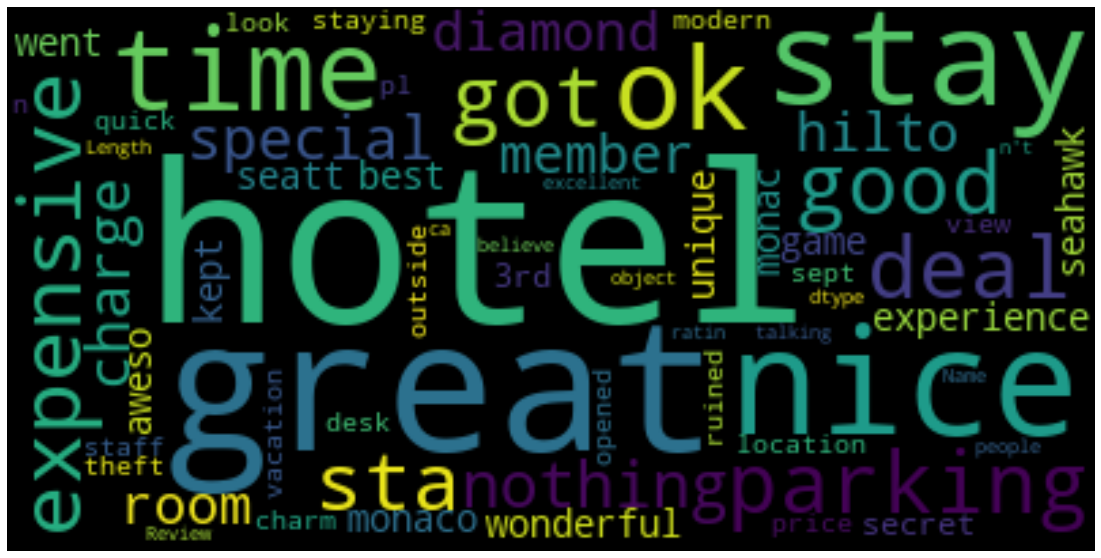

In [379]:
wordcloud = WordCloud(random_state=5).generate(str(data['Review']))

plt.figure(figsize=(25,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

This may just for fun, we can see the words that in the data set roughly from the word cloud.

Just as mentioned early, we use WordNetLemmatizer function to preprocessing data because sometime people would type wrong wrods accidentally.

In [200]:
lemmatizer = WordNetLemmatizer()

In [201]:
def pre_processing(row):
    _row=row.lower()
    _row = " ".join([lemmatizer.lemmatize(word) for word in _row.split()])
    return _row

In [202]:
data['Review'] = data['Review'].apply(pre_processing)

# Feature engineering

The next step is to extract features from data, so here we use CountVectorizer function to see the features in the data.

In [203]:
X = data['Review']
y = data['Rating']

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=5)

In [205]:
print(len(X_train), len(y_train))

10245 10245


In [206]:
X_train[5306]

'standard room bathroom like 2 star hotel don`t book standard room, room ok bathroom tired need refurbishment, shower bath shower head hooked, swivelled turned making difficult stand, no thermostat just hot cold mixer tap, nasty fall shower suddenly hot.i not recommend hotel,'

Here, we use the regular expression method to take out the punctuation marks.

In [211]:
re.sub('[^\w]', ' ', X_train[5306])

'standard room bathroom like 2 star hotel don t book standard room  room ok bathroom tired need refurbishment  shower bath shower head hooked  swivelled turned making difficult stand  no thermostat just hot cold mixer tap  nasty fall shower suddenly hot i not recommend hotel '

In [212]:
y_train[:10]

5306     1
13595    5
4630     5
4141     3
18937    3
6928     5
1545     5
10357    3
12902    3
2339     5
Name: Rating, dtype: int64

Then, we can count frequency of each presented words, the prepartion for sentiment analysis.

In [218]:
vectp = CountVectorizer().fit(X_train)

Transform data so that words become features (columns) and each review is a vector (row). This tells us how many times the features shows in that row.

In [219]:
X_trainp = vectp.transform(X_train)

In [220]:
repr(X_trainp)

"<10245x35538 sparse matrix of type '<class 'numpy.int64'>'\n\twith 835731 stored elements in Compressed Sparse Row format>"

There were 14343 sentences and 35538 words so this is a 14343 by 35538 matrix.

In [221]:
feats = vectp.get_feature_names()
print(feats[:20])

['00', '000', '0001', '000__çî_', '000hope', '000rp', '000sf', '000year', '00a', '00am', '00for', '00hrs', '00p', '00pm', '00us', '01', '0114', '01st', '02', '0200']


In [222]:
len(feats)

35538

# Modeling

### Logistic Regression

Since the data already has the target(label), it is supervised-learning.  
When we mention a classification with supervised-learning problem, logistic regression would be the first model come up with our brain. So we are going to take the outcome of this model as a benchmark. Yet, we know that logistic regression is usually to devide for two classes, since it has 5 classes in this data set, it might has worst prediction.  

Let us take a look if we train a Logistic Regression model on the trainin data.

In [223]:
scores = cross_val_score(LogisticRegression(), X_trainp, y_train, cv=5)

/Users/YuwenChiu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/YuwenChiu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

In [225]:
scores

array([0.58662762, 0.5636896 , 0.59492435, 0.56417765, 0.57101025])

In [226]:
np.mean(scores)

0.5760858955588091

Here is the outcome we only train X data set, the accuracy is about 0.58.  
It seems not bad. However, let us try more if we train with whole data set, incluing y training set, what the outcome would be.


In [227]:
vectq = CountVectorizer().fit(X_test)
X_testq = vectq.transform(X_test)
X_testq = X_testq[0: ,443:]

In [228]:
print(X_testq.shape, y_test.shape)

(10246, 35538) (10246,)


Now, retrain for whole training set, which means including y training set.

In [229]:
lrm = LogisticRegression().fit(X_trainp, y_train)

/Users/YuwenChiu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [230]:
accuracy_score(y_test, lrm.predict(X_testq))

0.27766933437439

In [231]:
pd.crosstab(y_test, lrm.predict(X_testq))

col_0,1,2,3,4,5
Rating,,,,,
1,24,119,37,217,313
2,29,134,72,249,399
3,25,237,94,292,444
4,81,729,288,745,1226
5,118,1129,373,1024,1848


We can find that LR works better when we only get by training on training set. 

#### LR with Grid search

Then, let us try grid search method to fine the optimal result.

In [232]:
param_grid={'C':[0.001,0.01,0.10,1,10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)

In [233]:
grid.fit(X_trainp,y_train)

/Users/YuwenChiu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/YuwenChiu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

/Users/YuwenChiu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/YuwenChiu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [234]:
grid.best_params_

{'C': 0.01}

In [235]:
grid.score(X_testq, y_test)

0.43597501463985944

It's helped. Yet, the outcome still has room to improve.

In [236]:
vectr = CountVectorizer(min_df=5).fit(X_train)
X_trainr = vectr.transform(X_train)

In [237]:
repr(X_trainr)

"<10245x9480 sparse matrix of type '<class 'numpy.int64'>'\n\twith 796737 stored elements in Compressed Sparse Row format>"

In [238]:
feature_names=vectr.get_feature_names()
print(feature_names[0:50])

['00', '000', '00am', '00pm', '01', '02', '03', '04', '05', '06', '07', '08', '09', '0900', '10', '100', '1000', '100m', '101', '1030', '104', '105', '108', '109', '10am', '10min', '10mins', '10pm', '10th', '11', '110', '1100', '112', '115', '11am', '11pm', '11th', '12', '120', '1200', '125', '129', '12pm', '12th', '13', '130', '1300', '135', '139', '13th']


In [239]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_trainr, y_train)

/Users/YuwenChiu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/YuwenChiu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

/Users/YuwenChiu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [240]:
grid.best_score_

0.5998047828208882

#### LR with tf-idf

Now, let us try the method by scaling data and tf-idf.

In [241]:
pipe = Pipeline([('scaler',TfidfVectorizer(min_df=5)),('logisticregression',LogisticRegression())])

In [242]:
new_param_grid={'logisticregression__C':[0.001,0.01,0.10,1,10]}

In [243]:
new_grid=GridSearchCV(pipe, param_grid=new_param_grid,cv=5)

In [244]:
new_grid.fit(X_train,y_train)

/Users/YuwenChiu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/YuwenChiu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', TfidfVectorizer(min_df=5)),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]})

In [245]:
new_grid.best_score_

0.605758906783797

It's improved.

Now, we are a bit curious what are the top 10 words in high vs low rating.

In [363]:
vectorizer=new_grid.best_estimator_.named_steps['scaler']

In [364]:
X_train_tf = vectorizer.transform(X_train)

In [365]:
max_val = X_train_tf.max(axis=0).toarray().ravel()

In [366]:
max_val[0:10]

array([0.47318838, 0.38441803, 0.47232338, 0.23588155, 0.48960242,
       0.5009571 , 0.38578445, 0.48553973, 0.39158735, 0.40938688])

In [367]:
sorted_by_tfidf = max_val.argsort()

In [368]:
feature_names = np.array(vectorizer.get_feature_names())

In [369]:
print(feature_names[sorted_by_tfidf[:30]])

['you__ç_é' 'aloe' 'timeshares' 'absolut' 'commodity' 'onward' 'deet'
 'foodthe' 'walkways' 'ounce' 'straighten' 'bohemia' 'adios' 'cameras'
 'sax' 'skewer' 'hadn__ç_é_' 'richie' 'thermos' 'por' 'spas'
 'groundskeeper' 'roulette' 'himitsu' 'role' 'we__ç_éêl' 'merchandise'
 'education' 'fountains' 'blatantly']


In [370]:
print(feature_names[sorted_by_tfidf[-30:]])

['miramar' 'fax' 'phoenix' 'riu' 'lenox' 'ic' 'drury' 'colomba' 'cosy'
 'excelent' 'casablanca' 'radisson' 'fita' 'residence' 'silla' 'brian'
 'kahala' 'bounty' 'draycott' 'h10' 'alessandra' 'rue' 'aviatic' 'rincon'
 'adagio' 'casitas' 'mouse' 'pa' 'commonwealth' 'hostal']


In [371]:
coefs = new_grid.best_estimator_.named_steps['logisticregression'].coef_[0]

In [372]:
top_pos=np.argsort(coefs)[-10:]
top_neg=np.argsort(coefs)[:10]
most_infl=np.hstack([top_neg,top_pos])

Text(0.5, 0, 'Feature')

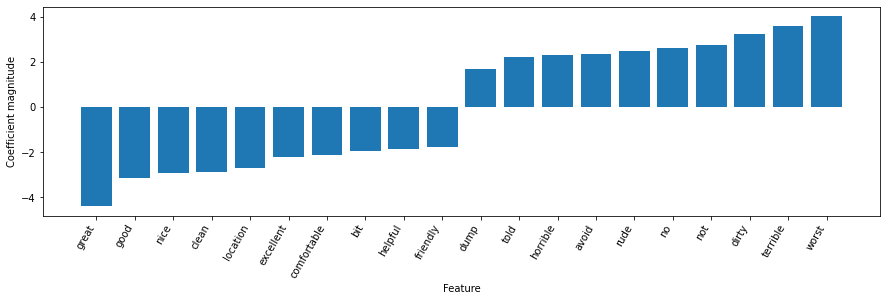

In [373]:
plt.figure(figsize=(15, 5))
plt.bar(np.arange(20), coefs[most_infl])
feature_names = np.array(feature_names)
plt.subplots_adjust(bottom=0.3)
plt.xticks(np.arange(0,20),feature_names[most_infl], rotation=60,ha="right")
plt.ylabel("Coefficient magnitude")
plt.xlabel("Feature")

Then, we can tell those words from above table. It may just for fun to let find some intering things in the data.

#### LR with N-Grams

There is another method might bring helps. Sometimes, the words have meaning when they are consecutive and N-Grams method can help we do this. Let us try trigrams.

In [254]:
pipe = Pipeline([('scaler',TfidfVectorizer(min_df=5)),('logisticregression',LogisticRegression())])

In [264]:
tri_param_grid={'logisticregression__C':[0.001,0.01,0.10,1,10],'scaler__ngram_range':[(1,3)]}

In [265]:
ggrid=GridSearchCV(pipe, param_grid=tri_param_grid,cv=5)

In [266]:
ggrid.fit(X_train,y_train)

/Users/YuwenChiu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/YuwenChiu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', TfidfVectorizer(min_df=5)),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1, 10],
                         'scaler__ngram_range': [(1, 4)]})

In [267]:
ggrid.best_score_

0.6027330405075646

In [259]:
ggrid.best_params_

{'logisticregression__C': 1, 'scaler__ngram_range': (1, 3)}

It seems do not bring much help for the result.

Let us see if we use bigrams.

In [260]:
bi_param_grid={'logisticregression__C':[0.001,0.01,0.10,1,10],'scaler__ngram_range':[(1,2)]}

In [261]:
ggrid2=GridSearchCV(pipe, param_grid=bi_param_grid,cv=5)

In [262]:
ggrid2.fit(X_train,y_train)

/Users/YuwenChiu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/YuwenChiu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', TfidfVectorizer(min_df=5)),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1, 10],
                         'scaler__ngram_range': [(1, 2)]})

In [263]:
ggrid2.best_score_

0.6033186920449

It looks better than trigrams.

### Gradient Boosting  

Next, let us see if we use gradient boosting model to train the data.   
We know the when we use gradient boosting model, the trees are grown sequentially and are kept small (prevent overfitting).   
So, maybe this model could work better.

In [274]:
gbr = GradientBoostingClassifier().fit(X_trainp, y_train)

In [275]:
accuracy_score(y_test, gbr.predict(X_testq))

0.4335350380636346

In [276]:
pd.crosstab(y_test, gbr.predict(X_testq))

col_0,1,2,3,4,5
Rating,,,,,
1,4,2,1,0,703
2,13,2,1,1,866
3,11,3,1,2,1075
4,26,4,8,9,3022
5,39,5,13,9,4426


The accuracy is greater than original LR model, which is around 28 %. 

#### GB with Grid search

We know that there are multiple parameters can affect the result in gradient boosting model, so let us try use grid search to find the paramters which work better.

In [385]:
parameters = {'learning_rate':[0.1,0.01], 'n_estimators':[1000, 1300]}

In [386]:
clfbs_g = GradientBoostingClassifier(random_state=5)

In [387]:
clfbs_grid = GridSearchCV(clfbs_g, parameters)
clfbs_grid.fit(X_trainr, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(random_state=5),
             param_grid={'learning_rate': [0.1, 0.01]})

In [388]:
clfbs_grid.best_score_

0.568862859931674

It's helpful.

In [389]:
clfbs_grid.best_params_

{'learning_rate': 0.1}

#### GB with tf-idf

In [390]:
clfbs_pipe = Pipeline([('scaler', TfidfVectorizer(min_df=5)), ('gradientboostingClassification', GradientBoostingClassifier())])

In [394]:
new_clfbs_param_grid = {'gradientboostingClassification__learning_rate':[0.1], 'gradientboostingClassification__n_estimators':[1300]}

In [395]:
new_clfbs_grid = GridSearchCV(clfbs_pipe, param_grid=new_clfbs_param_grid, cv=5)

In [396]:
new_clfbs_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', TfidfVectorizer(min_df=5)),
                                       ('gradientboostingClassification',
                                        GradientBoostingClassifier())]),
             param_grid={'gradientboostingClassification__learning_rate': [0.1],
                         'gradientboostingClassification__n_estimators': [1300]})

In [397]:
new_clfbs_grid.best_score_

0.5715959004392387

With the grid search method, the accuracy is improved.

#### GB with N-Grams

In [403]:
clfgb_param_grid = {'gradientboostingClassification__n_estimators':[1300],'scaler__ngram_range':[(1,2)]}

In [404]:
clfgb_ggrid = GridSearchCV(clfbs_pipe, param_grid = clfgb_param_grid, cv=5)

In [405]:
clfgb_ggrid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', TfidfVectorizer(min_df=5)),
                                       ('gradientboostingClassification',
                                        GradientBoostingClassifier())]),
             param_grid={'gradientboostingClassification__n_estimators': [1300],
                         'scaler__ngram_range': [(1, 2)]})

In [406]:
clfgb_ggrid.best_score_

0.5768667642752562

It's improved.

### Random Forest Classification

We know that random forest model is bulit on bootstrap sample of data, so that can let weak signals to speak. Then it might be a good choice to have the greater accuracy.
So, let us try another one which is random forest classification.

In [305]:
clfrf = RandomForestClassifier().fit(X_trainp, y_train)

In [306]:
accuracy_score(y_test, clfrf.predict(X_testq))

0.4386101893421823

It looks better than boost model.  
Yet, we still can try method to see if we can make it has better outcome.

#### RF with Grid search

In [336]:
parameters = {'n_estimators':[700, 1000, 1300]}

In [337]:
clfrf_g = RandomForestClassifier(max_features='sqrt', random_state=5)

In [340]:
clfrf_grid = GridSearchCV(clfrf_g, parameters)
clfrf_grid.fit(X_trainr, y_train)

GridSearchCV(estimator=RandomForestClassifier(max_features='sqrt',
                                              random_state=5),
             param_grid={'n_estimators': [700, 1000, 1300]})

In [345]:
clfrf_grid.best_score_

0.5364568081991214

In [346]:
clfrf_grid.best_params_

{'n_estimators': 1300}

It's improved. Then, let try some more.

#### RF with tf-idf

In [353]:
clfrf_pipe = Pipeline([('scaler', TfidfVectorizer(min_df=5)), ('randomforestClassification', RandomForestClassifier())])

In [354]:
new_clfrf_param_grid = {'randomforestClassification__n_estimators':[1300]}

In [355]:
new_clfrf_grid = GridSearchCV(clfrf_pipe, param_grid=new_clfrf_param_grid, cv=5)

In [356]:
new_clfrf_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', TfidfVectorizer(min_df=5)),
                                       ('randomforestClassification',
                                        RandomForestClassifier())]),
             param_grid={'randomforestClassification__n_estimators': [1300]})

In [357]:
new_clfrf_grid.best_score_

0.5351878965348951

#### RF with N-Grams

In [358]:
clfrf_param_grid = {'randomforestClassification__n_estimators':[1300],'scaler__ngram_range':[(1,2)]}

In [359]:
clfrf_ggrid = GridSearchCV(clfrf_pipe, param_grid = clfrf_param_grid, cv=5)

In [360]:
clfrf_ggrid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', TfidfVectorizer(min_df=5)),
                                       ('randomforestClassification',
                                        RandomForestClassifier())]),
             param_grid={'randomforestClassification__n_estimators': [1300],
                         'scaler__ngram_range': [(1, 2)]})

In [361]:
clfrf_ggrid.best_score_

0.5300146412884335

We can observe from the outcome, other methods like tf-idf and n-grams seem do not help much in random forest model.

Last, maybe just for fun, we can take a look of the related words by using the word2vec model.

In [374]:
texts=[ re.sub("[^\w]", " ", str(review)).split() for review in X_train] 

In [375]:
model = Word2Vec(texts, size=50, window=10, min_count=5, sample=1e-3, workers=2)

In [376]:
model.wv.most_similar(positive='great')

[('fantastic', 0.7991313338279724),
 ('perfect', 0.7814468741416931),
 ('excellent', 0.7637667059898376),
 ('wonderful', 0.7461878061294556),
 ('terrific', 0.742800235748291),
 ('good', 0.7207186818122864),
 ('nice', 0.712812066078186),
 ('fabulous', 0.6914224028587341),
 ('brilliant', 0.6730890870094299),
 ('loved', 0.6628646850585938)]

In [377]:
model.wv.most_similar(positive='expensive')

[('overpriced', 0.892159104347229),
 ('pricey', 0.8917731046676636),
 ('reasonable', 0.8434616327285767),
 ('option', 0.8393158912658691),
 ('cheaper', 0.8113552331924438),
 ('range', 0.8001254200935364),
 ('cheap', 0.7969598770141602),
 ('fraction', 0.7831597328186035),
 ('prices', 0.7798192501068115),
 ('price', 0.7646291255950928)]

# Conclusion

We can observe from the outcomes, the LR model works best with the 61% accuracy. 
To be honest, this result is not expected.   


So when we looked back what happened during the procedure, if we only trained the data and predicted with test set (not use grid search method etc.), we could find that boosting model has the highest accuracy about 44% compared to other two models. However, when we used the grid search method, the LR models has the great improvement. We thought the reason may caused by the parameter we set. In other words, we might did better if we tried other parameter value. The reason why we did not try to tune parameter with grid search more is that each of trial could take at least two hours. It's actually time-consuming.   
  
  

Another issue we may took some time to discuss is the metric we used to test for the outcome. We knew from above process, we used accuracy score in this project. Yet, if we look deeper, we could find that most of prediction are inclined to predict the class 5. It might cause by the imblance data in original data set. So here has a room we could do better in the future. Maybe we could use SMOKE to solve the problem for imblance data and using F1 score instead of accuracy score to measure the outcome.


In general, there are two major directions we can try more and deal with in the future, one is the parameter of grid search, the other one is imblance data in training set. We might get different result if we address those issue and get better performance.

